---
---

It is known that the sign 𝑥[𝑛] is sampled with 𝐹𝑠 = 40 𝑘𝐻𝑧. The discrete time 𝑥[𝑛] sign is intended to rest in a music system with a sampling frequency of 50 kHz. The sign x[n] = $cos(\pi n/5)$ was created so that the total number of samples N = 20.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'x[n]')

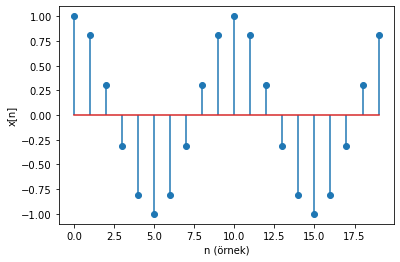

In [8]:
N = 20
n=np.arange(0.,N) 
x=np.cos(np.pi*n/5) 

plt.figure()
plt.stem(n,x,use_line_collection=True)

plt.xlabel("n (örnek)")
plt.ylabel("x[n]")

The rate must be 40kHz / 50kHz = 4/5 in order to transform a 40 kHz frequency signal into 50 kHz sampling frequency. Thus $L=5$ and $M=4$

##### First step: The x[n] signal has been defined and sampled at 40kHz. Then the fourier transform of the sampled signal is taken so that it can be examined in the frequency domain.

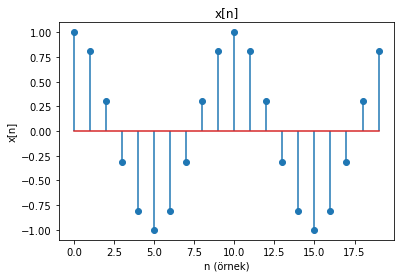

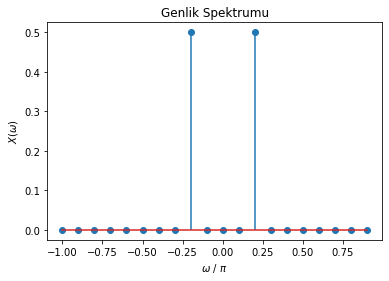

In [11]:
Fs=40000
Ts=1/Fs
N=20
n=np.arange(0,N)
xn=np.cos(np.pi*n/5)

w=np.arange(-np.pi,np.pi,2*np.pi/N)
xw=np.fft.fftshift(np.fft.fft(xn,N)/N)

plt.figure()
plt.stem(n,xn,use_line_collection=True)
plt.title("x[n]")
plt.xlabel("n (örnek)")
plt.ylabel("x[n]")

plt.figure()
plt.stem(w/np.pi,abs(xw),use_line_collection=True) 
plt.title("Genlik Spektrumu")
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X(\omega)$") 
plt.show()

###### Second step: The next step is upsampling. In this step, the sign $x_{u}[n]$ and its fourier transform is taken. The obtained signs were plotted.

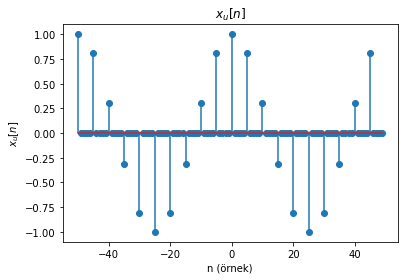

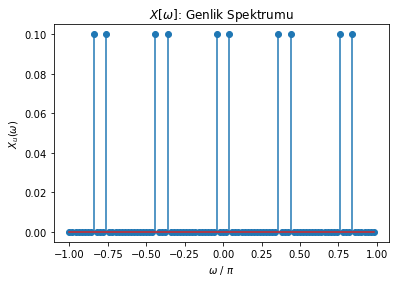

In [12]:
L = 5

N_u = N*L 
xn_u = np.zeros(N_u)
xn_u[np.arange(0,len(xn_u),L)] = xn 
n_u = np.arange(-N_u/2,N_u/2)

w_u = np.arange(-(np.pi), (np.pi), 2*(np.pi)/N_u)
xw_u = np.fft.fftshift(np.fft.fft(xn_u, N_u)/N_u)

plt.figure()
plt.stem(n_u,xn_u,use_line_collection=True)
plt.title('$x_u[n]$')
plt.ylabel('$x_u[n]$')
plt.xlabel('n (örnek)')

plt.figure()
plt.stem(w_u/np.pi,abs(xw_u),use_line_collection=True)
plt.title("$X[\omega]$: Genlik Spektrumu")
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X_u(\omega)$") 
plt.show()

##### Third step:  After upsampling, the $x_{u}[n]$ sign is interpolated. Linear interpolation is used and for this the $h_{lin}[n]$ impulse response of the system is defined in the following code block in accordance with the given in the sheet.

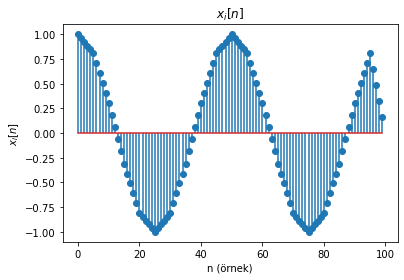

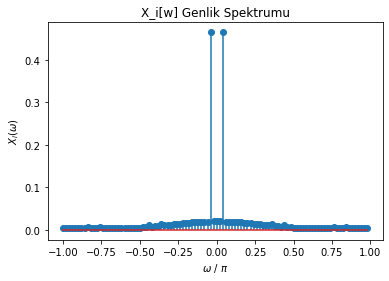

In [13]:
hlin=np.array([0,1/5,2/5,3/5,4/5,1,4/5,3/5,2/5,1/5,0])
xn_i = np.convolve(xn_u,hlin,'same')
n_i = np.arange(0, len(xn_i))

R=len(xn_i)
w_i = np.arange(-(np.pi), (np.pi), 2*(np.pi)/R)
xw_i = np.fft.fftshift(np.fft.fft(xn_i, R)/R)

plt.figure()
plt.stem(n_i,xn_i,use_line_collection=True) # xi[n]
plt.title("$x_i[n]$")
plt.xlabel("n (örnek)")
plt.ylabel("$x_i[n]$")

plt.figure()
plt.stem(w_i/np.pi,abs(xw_i),use_line_collection=True) # Xi(𝜔)
plt.title("X_i[w] Genlik Spektrumu")
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X_i(\omega)$")
plt.show()

##### Fourth Step: The sign $x_{i}[n]$, which is formed as a result of interpolation, is downsampled in this step.

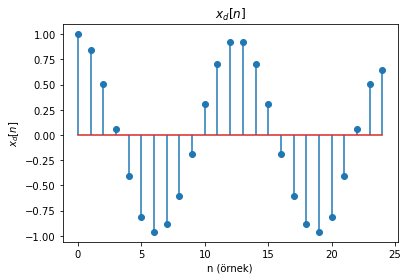

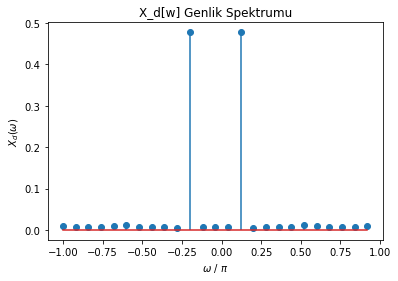

In [14]:
M = 4
xn_d = xn_i[np.arange(0, np.size(xn_i, 0), M)] # xd[n]
n_d=(round)(N/M)
Zd=len(xn_d)

w_d = np.arange(-(np.pi), (np.pi), 2*(np.pi)/Zd)
xw_d = np.fft.fftshift(np.fft.fft(xn_d, Zd)/Zd) # Xd(𝜔)

plt.figure()
plt.stem(xn_d, use_line_collection=True) 
plt.title('$x_d[n]$')
plt.xlabel("n (örnek)")
plt.ylabel("$x_d[n]$")

plt.figure()
plt.stem(w_d/np.pi,abs(xw_d),use_line_collection=True)
plt.title("X_d[w] Genlik Spektrumu")
plt.xlabel("$\omega$ / $\pi$") 
plt.ylabel("$X_d(\omega)$") 
plt.show()